In [2]:
from model import get_models_and_path
models = get_models_and_path()


In [7]:
resFreeze = models[-4]
print(resFreeze[0].__class__.__name__)
print(resFreeze[1])
res = models[-5]
print(res[0].__class__.__name__)
print(res[1])


In [14]:
target = "gene1.0.bias"

for name, param in resFreeze[0].named_parameters():
    if name != target:
        continue
    
    print(name, ": ", param.data)
    
for name, param in res[0].named_parameters():
    if name != target:
        continue
    #print(name)
    print(name, ": ", param.data)
    

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../Training_Data/p009/Preprocessed_STDataset/gene_data.csv")
print(df.head())

In [4]:
print(df["MKI67"])

In [9]:
df = pd.read_csv("../Training_Data/p013/Preprocessed_STDataset/gene_data.csv")
print(df.head())
mk = df["MKI67"]
rb = df["RUBCNL"]

#RUBCNL

In [10]:
print(rb.min())
print(mk.min())


In [11]:
rb.value_counts()

In [12]:
mk.value_counts()


In [18]:
class A():
    def __init__(self, mylist):
        for item in mylist:
            setattr(self, item, item + "xxx")
            print(getattr(self, item))
            print(item)
a = A(["a", "b"])

In [19]:
a.c = "asb"
print(getattr(a, "b"))
print(a.b)
print(a.c)

In [9]:
import json
json_path = "./test.json"
with open(json_path, "w") as f:
    json_dict = {"type":"vgg13", "random_weights":True, 'gene_list':["abc", "def"], "dropout": True, "pretrained_output_dim":1000}
    json.dump(json_dict, f)
    
with open(json_path) as f:
    d = json.load(f)
    print(d)
    model_type = d["type"]
    print(type(model_type), model_type)
    random_weights = d["random_weights"]
    print(type(random_weights), random_weights)
    
    gene_list = d["gene_list"]
    print(type(gene_list), gene_list)
    
    dropout = d["dropout"]
    print(type(dropout), dropout)
    
    pretrained_output_dim = d["pretrained_output_dim"]
    print(type(pretrained_output_dim), pretrained_output_dim)
    

In [2]:
import matplotlib.pyplot as plt
path = "../models/resnet18/MKI67_random_freeze/ep_29_results.csv"
from plot_and_print import plot_data_scatter
data_dir = "../models/resnet18/MKI67_random_freeze/"
plot_data_scatter(data_dir)

TypeError: plot_data_scatter() missing 2 required positional arguments: 'patient' and 'genes'

<All keys matched successfully>
   Unnamed: 0                                            path  labels_RUBCNL  \
0           0  ../Training_Data//p016/Tiles_156/p016_1_0.tiff      -1.072489   
1           1  ../Training_Data//p016/Tiles_156/p016_4_0.tiff      -1.072489   
2           2  ../Training_Data//p016/Tiles_156/p016_5_0.tiff      -1.072489   
3           3  ../Training_Data//p016/Tiles_156/p016_6_0.tiff      -1.072489   
4           4  ../Training_Data//p016/Tiles_156/p016_7_0.tiff      -1.072489   

   out_RUBCNL  
0   -0.181118  
1   -0.188338  
2   -0.176325  
3   -0.180102  
4   -0.172896  
['RUBCNL']


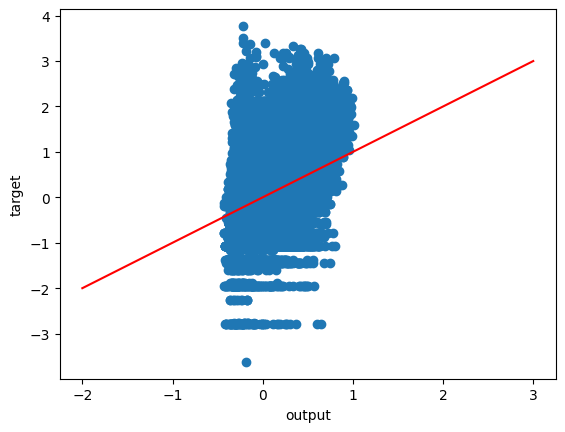

In [19]:
import pandas as pd
from model import load_model
gene = "RUBCNL"
merge = pd.read_csv("../models/resnet50/" + gene + "_random_freeze_dropout/ep_29_results.csv")
model = load_model("../models/resnet50/" + gene + "_random/", "../models/resnet50/" + gene + "_random/ep_29.pt")
print(merge.head())
print(model.gene_list)
plt.scatter(merge['out_' + gene], merge['labels_' + gene], )
plt.plot( [-2,3],[-2,3], color='red' )
plt.xlabel('output')
plt.ylabel('target')
plt.show()


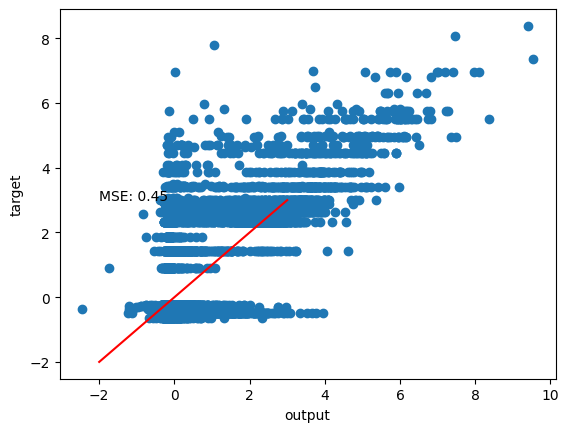

In [15]:
for gene in model.gene_list:
    out_string = "out_" + gene
    labels_string = "labels_" + gene

    plt.scatter(merge[out_string], merge[labels_string])
    import torchmetrics
    import torch
    mse = torchmetrics.MeanSquaredError()
    result = mse(torch.tensor(merge[out_string].to_numpy()), torch.tensor(merge[labels_string].to_numpy()))

    plt.text(x=-2, y=3, s="MSE: " + str(round(result.item(), 2)))
    plt.plot([-2,3],[-2,3], color='red')
    plt.xlabel('output')
    plt.ylabel('target')
plt.show()
    #plt.savefig(row["model_dir"] + "/scatter.png")